In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [26]:
iris = pd.read_csv("US_Accidents_Dec21_updated.csv")
x = iris.iloc[:, [4, 5]].values
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)


In [27]:
x

array([[  40.10891,  -83.09286],
       [  39.86542,  -84.0628 ],
       [  39.10266,  -84.52468],
       ...,
       [  33.77545, -117.84779],
       [  33.99246, -118.40302],
       [  34.13393, -117.23092]])

In [28]:
arr_x=[]
arr_y=[]
X=np.empty((20000, 2),float)
for i in range(20000):
    arr_x.append(x[i,0])
    arr_y.append(x[i,1])
    X[i][0]=x[i,0]
    X[i][1]=x[i,1]


In [29]:
X

array([[ 40.10891, -83.09286],
       [ 39.86542, -84.0628 ],
       [ 39.10266, -84.52468],
       ...,
       [ 38.88753, -94.79028],
       [ 32.84015, -97.17856],
       [ 32.77032, -97.29787]])

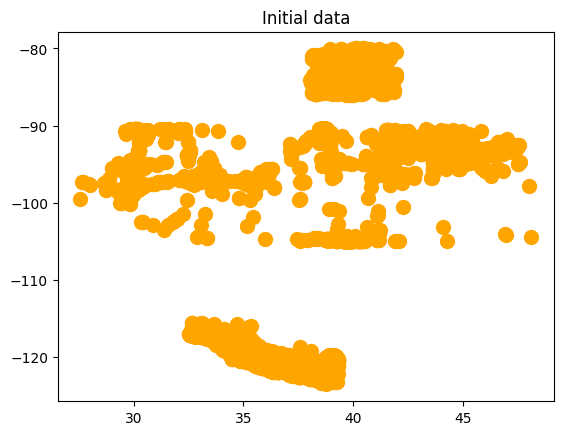

In [34]:
plt.scatter(arr_x,arr_y, s = 100, c = 'orange')
plt.title('Initial data')
plt.show()


68.365 0.001
7.19 0.06220408163265306
4.07 0.12340816326530613
2.64 0.1846122448979592
1.64 0.24581632653061225
1.225 0.3070204081632653
0.88 0.3682244897959184
0.625 0.42942857142857144
0.48 0.4906326530612245
0.43 0.5518367346938776
0.38 0.6130408163265306
0.32 0.6742448979591836
0.29 0.7354489795918367
0.24 0.7966530612244899
0.215 0.8578571428571429
0.21 0.9190612244897959
0.205 0.980265306122449
0.15 1.041469387755102
0.135 1.1026734693877551
0.135 1.163877551020408
0.135 1.2250816326530611
0.11 1.2862857142857143
0.11 1.3474897959183672
0.105 1.4086938775510203
0.1 1.4698979591836734
0.1 1.5311020408163265
0.1 1.5923061224489796
0.08 1.6535102040816325
0.055 1.7147142857142856
0.055 1.7759183673469388
0.04 1.8371224489795916
0.035 1.8983265306122448
0.035 1.9595306122448979
0.035 2.020734693877551
0.035 2.081938775510204
0.03 2.1431428571428572
0.02 2.2043469387755104
0.02 2.265551020408163
0.02 2.326755102040816
0.015 2.3879591836734693
0.015 2.4491632653061224
0.015 2.510367346

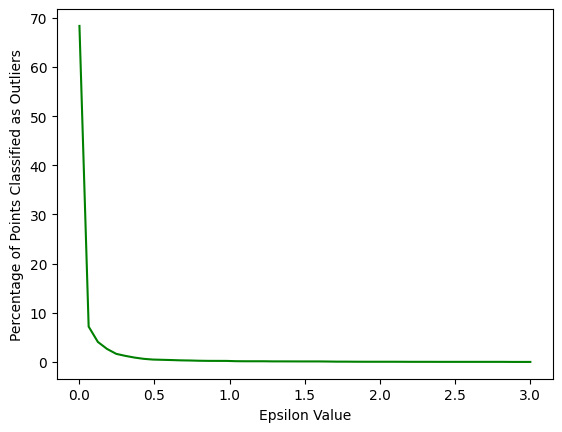

In [45]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=4)
    dbscan.fit(X)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)
    print(perc_outliers,eps)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.show()

In [44]:
m = DBSCAN(eps=0.49063265306, min_samples=9)
ydbscan=m.fit_predict(X)

In [43]:
for i in range(len(ydbscan)):
    print(ydbscan[i])

0
0
0
1
0
0
0
1
-1
0
0
0
1
0
1
1
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
2
1
1
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
1
0
4
2
1
1
0
1
1
1
0
1
1
3
1
1
0
0
1
0
0
0
1
1
0
0
0
3
3
1
0
4
0
1
0
0
0
1
3
1
0
0
0
0
1
1
0
0
1
1
1
1
1
0
3
1
1
1
0
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
1
2
1
0
0
0
0
0
0
0
0
0
1
1
0
2
1
0
1
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
2
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
1
1
1
0
0
1
-1
1
0
1
0
0
0
0
0
-1
2
0
0
0
1
2
3
2
0
4
3
0
1
1
1
1
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
2
2
0
1
1
1
1
-1
0
0
0
1
0
0
1
0
1
1
1
0
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
2
0
0
3
1
1
0
1
0
0
0
1
0
0
0
1
0
4
1
3
0
0
0
1
2
2
1
-1
-1
0
0
1
0
0
3
0
3
3
0
0
2
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
2
2
1
0
1
0
0
0
0
1
1
0
0
2
3
2
-1
1
1
3
1
0
1
2
0
0
1
0
0
-1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
1
0
0
2
2
2
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
0
1
1
1
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
2
0
0
0
0
1
1
1
0
3
0
0
0
1
4
0
1
4
0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


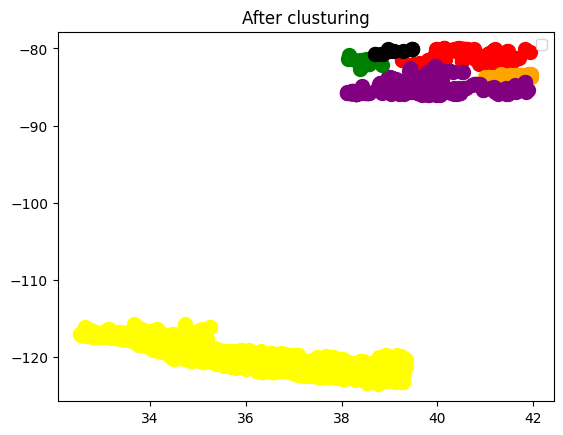

In [42]:
plt.scatter(X[ydbscan == 1, 0], X[ydbscan == 1, 1], s = 100, c = 'red')
plt.scatter(X[ydbscan == 2, 0], X[ydbscan == 2, 1], s = 100, c = 'orange')
plt.scatter(X[ydbscan == 0, 0], X[ydbscan == 0, 1], s = 100, c = 'purple')
plt.scatter(X[ydbscan == 3, 0], X[ydbscan == 3, 1], s = 100, c = 'green')
plt.scatter(X[ydbscan == 4, 0], X[ydbscan == 4, 1], s = 100, c = 'black')
plt.scatter(X[ydbscan == 5, 0], X[ydbscan == 5, 1], s = 100, c = 'yellow')
plt.title('After clusturing')
plt.legend()
plt.show()

In [41]:
import pandas as pd 
import matplotlib. pyplot as plt 
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

<AxesSubplot:>

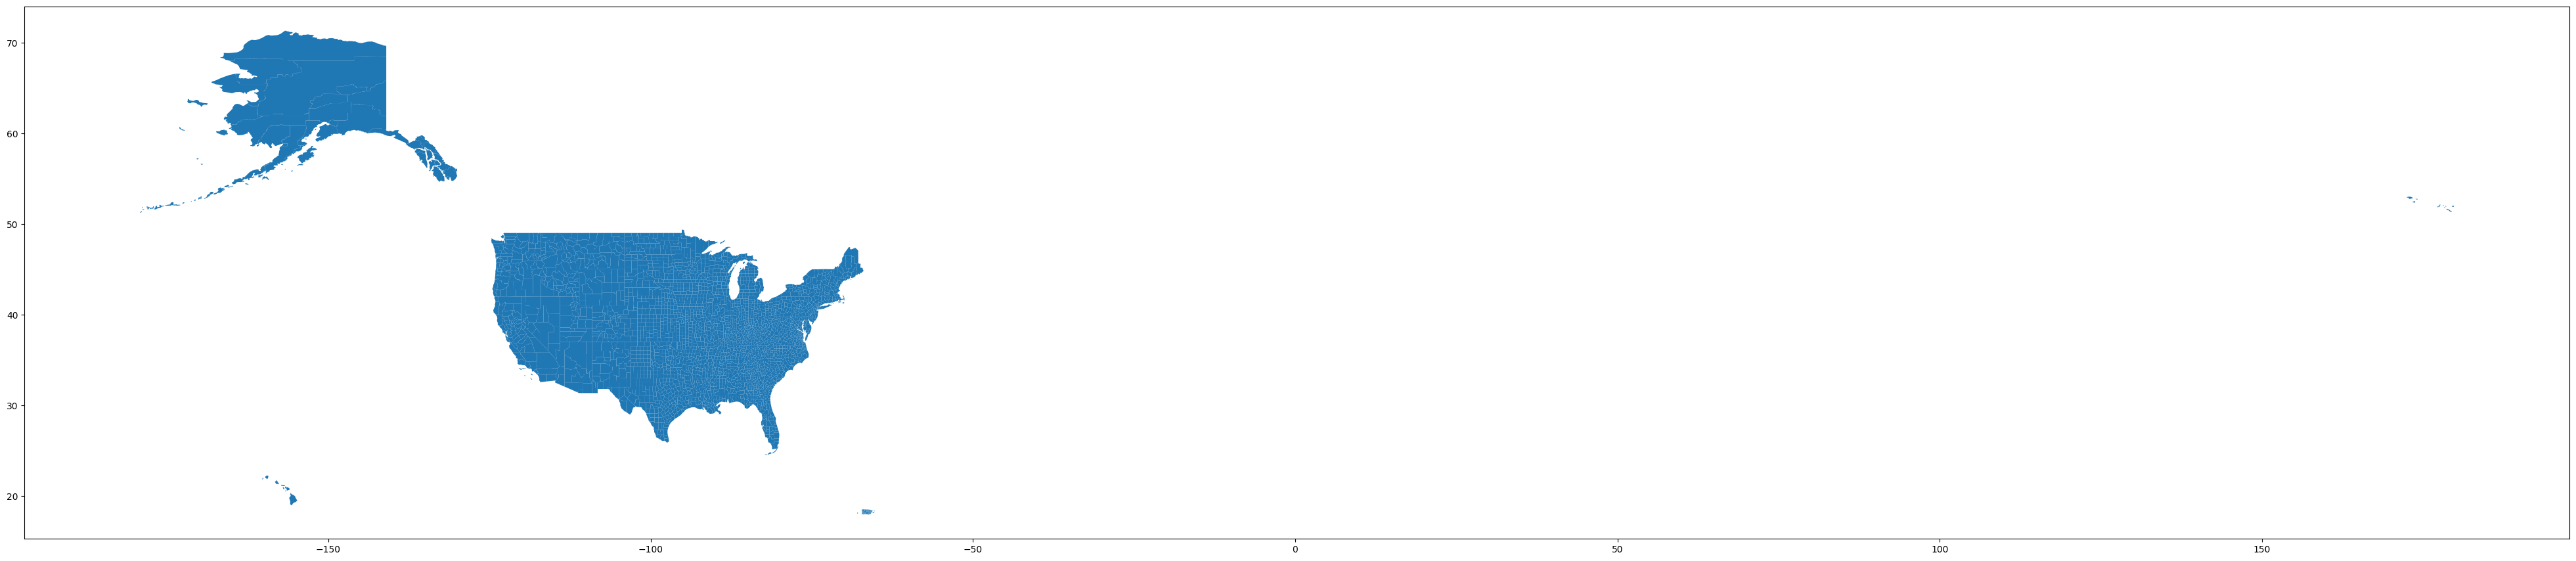

In [40]:
street_map= gpd.read_file('/Users/adityakumar/Downloads/StatPlanet_USA_County/map/map.shp')
fig,ax = plt. subplots( figsize = (50,500))
street_map.plot (ax = ax)